# Entrega 5.1 - Clasificador (Regresión Logística)

### Grupo 07:
     - Renzo Gambone C.I. 5.155.486-4
     - Germán Ouviña C.I. 4.823.566-1
     - Leandro Rodríguez C.I 4.691.736-4


## 1. Introducción
***
### 1.1. Objetivo
***
El objetivo de esta tarea fue implementar clasificadores basados en **regresión logística**, aplicando **PCA** en el corpus para ciertos escenarios. Una vez generados distintos clasificadores en base a varios parámetros, se evaluó la performance de los mismos utilizando distintos tipos de métricas y se compararon dichas evaluaciones con el fin de determinar cual modelo se ajustó mejor a cada escenario.

En términos formales, los parámetros del problema se reducen a lo siguiente:
- **Tarea *T*:** Clasificar ejemplos de un conjunto restringido a cierto formato dado.
- **Experiencia *E*:** Conjunto de datos del formato apropiado con ejemplos previamente clasificados.
- **Performance *P*:** Múltiples tipos de medidas (las cuales se profundizan en la sección 2.4).

### 1.2. Entrega
***
La entrega de esta tarea consta de dos grandes componentes:
- **Informe** en formato de Jupyter Notebook (este informe).
- **Programa** que permite entrenar clasificadores, evaluar su desempeño, etc.

El objetivo del informe es centralizar la información relativa a las pautas de la letra, situando el enfoque en la construcción de los distintos modelos, así como en los datos obtenidos mediante las pruebas realizadas con varias configuraciones paramétricas. Se adjuntan algunos scripts para ayudar a la lectura o probar en tiempo real ciertas funcionalidades.

Por otra parte, el programa ofrece una interfaz en consola que permite entrenar y evaluar clasificadores acorde a múltiples configuraciones paramétricas. A su vez, permite comparar distintos clasificadores automaticamente. Si bien todas estas herramientas fueron pensadas para uso del grupo, en el archivo *README.md* se adjunta una sencilla guía de como utilizarlas.

### 1.3. Estructura
***
En las siguientes secciones se especifica el diseño del modelo, justificando la toma de decisiones a la hora de establecer los parámetros y detallando que bibliotecas fueron utilizadas, junto a las métricas utilizadas en la evaluación. Luego, se detalla la metodología de experimentación y con la misma los resultados obtenidos para cada modelo y cada conjunto de datos, habiendo entrenado con distintas configuraciones paramétricas. Finalmente se agregan conclusiones respecto a los resultados obtenidos.

Como detalle importante, dado que el informe se construyó siguiendo la estructura utilizada en anteriores entregas, se cubren aspectos teóricos y analíticos no pedidos explícitamente en la consigna. Dichos aspectos se encuentran en las secciones **2 (Diseño)** y **4 (Conclusiones)** respectivamente. Por otra parte, las pautas de la tarea se cubren en la sección **3 (Experimentación)**, más concretamente:
- Las partes ***a*** y ***b*** se tratan en la **sección 3.2 (Partición y evaluación del corpus)**
- Las partes ***c***, ***d*** y ***e*** se tratan en la **sección 3.3 (Configuraciones paramétricas)** y en la **sección 3.4 (Elección y comparación de representantes)**
- La parte ***f*** se trata en la **sección 3.5 (Comparación de clasificadores según partido)**

## 2. Diseño
***
En esta sección se detallan las características del modelo implementado, profundizando sobre las estrategias y algoritmos empleados en la configuración paramétrica. También se tratan otros puntos como el procesamiento previo al entrenamiento y la evaluación posterior al mismo.

### 2.1. Modelo
***
Para este escenario el modelo propuesto es el de **regresión logística**, un modelo de clasificación que adapta la idea de la **regresión lineal**, es decir, aproximar en base a los ejemplos del corpus una función con codomino continuo, y transformar el resultado continuo en uno discreto, utilizando una **función de probabilidad** y asignando a dicha probabilidad una clase en concreto.

Se definen más formalmente las siguientes nociones:
* $D =$ Conjunto de entrenamiento
* $C_D =$ Conjunto de posibles clasificaciones para $d \in D$
* $RL_D =$ Clasificador de regresión logística generado en base a $D$
* Se representa una clasificación de un ejemplo $d \in D$ realizada por el clasificador $RL_D$ como $RL_D(d) = c : c \in C_D$

### 2.2. Preprocesamiento
***
Con el objetivo de cumplir parte de las pautas de la consigna, se realizaron ciertos cambios en el conjunto de datos a utilizar. A continuación, se listan los cambios realizados agrupandolos en base a motivación y área cambiada en el conjunto original.

#### 2.2.1. Extracción de candidatos y partidos
***
La consigna requiere la filtración del corpus original, extrayendo aquellos potenciales votantes que votarían a candidatos con menos de 1000 potenciales votos, generando un corpus donde todos los posibles candidatos cuentan con más de 1000 votos. El proceso análogo debería seguirse al filtrar los partidos con más de 1000 votos en el corpus original.

De esta forma, el primer preprocesamiento que se realiza al corpus original es la filtración de candidatos y partidos con más de 1000 votos, generando dos corpus nuevos denominados **conjunto de datos por candidato** y **conjunto de datos por partido**. Cabe destacar que ambos conjuntos no cuentan con los mismos ejemplos, ya que existen candidatos con menos de 1000 votos que pertenecen a partidos que, en total, suman más de 1000 votos, por lo que todos los potenciales votantes de esos candidatos son eliminados del primer conjunto pero mantenidos en el segundo.

Para implementar dicho filtrado se utilizó la biblioteca _pandas_, más concretamente la clase _DataFrame_.

#### 2.2.2. Reducción de dimensionalidad
***
La consigna requiere la experimentación reduciendo la dimensionalidad del corpus original y determinando con cuantas dimensiones se maximiza la precisión del modelo entrenado.

De esta forma, luego de generar el **conjunto de datos por candidato** y el **conjunto de datos por partido**, se brinda la opción de reducir $n : n \in [1..25]$ dimensiones a ambos conjuntos.

Para implementar dicha transformación se utilizó la biblioteca _scikit-learn_, más concretamente la clase _PCA_ del módulo _decomposition_.

#### 2.2.3. Separación de conjuntos de entrenamiento y evaluación
***
La consigna requiere la separación del corpus en dos subconjuntos: un **conjunto de entrenamiento**, representando el 80% del corpus original, y un **conjunto de evaluación**, representando el 20% restante.

Una vez procesado el corpus original siguiendo las estrategias anteriormente mencionadas, se procede a generar ambos conjuntos, almacenandolos en el modelo correspondiente.

Para implementar dicha partición se utilizó la biblioteca _scikit-learn_, más concretamente la función *train_test_split* del módulo *model_selection*.

### 2.3. Algoritmo
***
En la siguiente sección se centralizan todas las especificaciones relativas a los algoritmos empleados, tanto para entrenar como para clasificar. Se detallan las bibliotecas utilizadas, así como la variación paramétrica y sus impactos.

#### 2.3.1. Algoritmo de entrenamiento
***

El algoritmo de entrenamiento implementado para la **regresión logística** sigue las pautas del visto en el teórico. Dado que en esta ocasión no fue necesario desarrollarlo, solamente se mencionaran sin entrar en detalle aquellos aspectos teóricos o algorítmicos relativos al mismo.

La biblioteca utilizada fue *scikit-learn*, tomando la implementación de la clase *LogisticRegression* del módulo *linear_model*. El método que ajusta el modelo al corpus en concreto es **_LogisticRegression.fit_**. La clase en cuestión permite realizar el entrenamiento en función de múltiples parámetros, dando a lugar a distintas configuraciones paramétricas. Dichos parámetros se detallarán en las siguientes secciones.

Como breve repaso del funcionamiento del algoritmo, utilizando un método de aproximación en concreto, se realiza una suerte de interpolación utilizando los ejemplos del corpus y sus clasificaciones como guía, generando de esta forma una función que permite generar nuevas clasificaciones. El parámetro **_solver_** permite determinar que algoritmo de aproximación utilizar. Las opciones disponibles son las siguientes:
- **Algoritmo de Newton** (_newton-cg_): Dicho algoritmo permite aproximar funciones utilizando además del gradiente, la **matriz hessiana**. Dado que debe computar la matriz, es computacionalmente costoso, pudiendo además quedar atascado en un **punto silla**, el cual es un tipo particular de **punto de inflexión** que no es extremo local pero tiene gradiente nulo. Dada la naturaleza del algoritmo, es particularmente bueno para aproximar a funciones cuadráticas.
<br><br>
- **Algoritmo de memoria limitada Broyden–Fletcher–Goldfarb–Shanno** (_lbfgs_): Perteneciente a la familia de algoritmos similares al **algoritmo de Newton**, **_LBFGS_** computa una aproximación de la **matriz hessiana** para aproximar la función objetivo, por lo que es computacionalmente menos costoso que el anteriormente mencionado, funcionando mejor con conjuntos de datos con pocos ejemplos. 
<br><br>
- **Algoritmo Liblinear** (_liblinear_): El algoritmo utilizado por defecto, basado en la biblioteca homónima de _C++_. Se basa en la idea del **descenso por coordenadas**, por lo que puede quedar atascado en un **punto de inflexión** que no sea extremo local. Tiene buenos resultados en conjuntos de datos con pocos ejemplos.
<br><br>
- **Algoritmo de Promedio Estocástico de Gradiente** (_sag_): Este algoritmo pertenece a la familia de los que implementan **descenso por gradiente estocástico**, siendo particularmente bueno para conjuntos de datos grandes con muchos atributos. Esto está relacionado al hecho de que el costo es independiente los términos de la suma (atributos).
<br><br>
- **Algoritmo de Promedio Estocástico de Gradiente Avanzado** (_saga_): Esta inspirado en el algoritmo **_SAG_**, incorporando conceptos de otro método denominado **_SVRG_** (_Stochastic Variance Reduced Gradient_, Reducción de Varianza por Gradiente Estocástico). Esto permite implementar otro tipo de penalización durante el entrenamiento (en la sección 2.3.4. se expande este punto).

#### 2.3.2. Algoritmo de clasificación
***
El algoritmo de clasificación implementado para la **regresión logística** sigue las pautas del visto en el teórico. Dado que en esta ocasión no fue necesario desarrollarlo, solamente se mencionaran sin entrar en detalle aquellos aspectos teóricos o algorítmicos relativos al mismo.

La biblioteca utilizada fue *scikit-learn*, tomando la implementación de *LogisticRegression* del módulo *linear_model*. El método que ajusta el modelo al corpus en concreto es **_LogisticRegression.predict_**. La clase en cuestión permite realizar el entrenamiento en función de múltiples parámetros, pudiendo generar distintos clasificadores, lo cual afectaría el algoritmo de clasificación empleado. El parámetro ***multi_class*** permite determinar que enfoque utilizar.

En el contexto de esta tarea se utilizó únicamente un modelo **_One-Versus-Rest_** (_ovr_), el cual coincide con el visto en el teórico. Como breve repaso del funcionamiento del algoritmo, por cada clase $c \in C_D$ se genera una aproximación utilizando **regresión lineal**, separando los ejemplos entre aquellos con clasificación $c$ y aquellos con clasificación distinta a $c$. De esta forma, al clasificar un nuevo ejemplo, se obtiene la probabilidad de que dicho ejemplo pertenezca a cada clase $c \in C_D$, devolviendose la clase correspondiente a la probabilidad mayor.

#### 2.3.3. Parámetros - Normalización
***
Debido al método de entrenamiento, la diferencia entre los intervalos de cada atributo puede afectar negativamente a la aproximación de la función de clasificación. Es por esto que se introduce la posibilidad de **normalizar** dichos intervalos, con el objetivo de llevar todos los atributos a la misma escala.

Dado que en este escenario los atributos del corpus (es decir, las respuestas a las preguntas) toman valores en el mismo intervalo $[1..5]$, no es necesario hacer una normalización de los datos de entrada.

#### 2.3.4. Parámetros - Regularización y penalización
***
Debido al método de entrenamiento, es posible que el algoritmo **sobreajuste** la aproximación de la función de clasificación. Si ocurre un sobreajuste, se pierde la capacidad de generalización del algoritmo, pudiendo fallar notoriamente en clasificaciones de ejemplos no vistos. De esta forma, se agrega el concepto de **regularización**, siendo el proceso utilizado para evitar que la regresión se sobreajuste a los datos de entrenamiento.

La técnica, de forma simplificada, consiste en agregar un componente de penalización a la función de costo a minimizar. Dicho componente sigue cierta **estrategia de penalización** y en ciertos casos utiliza un **coeficiente de regularización**. La clase en cuestión ofrece parámetros para determinar ambos.

Por un lado, el parámetro **_penalty_** permite determinar que **algoritmo de regularización** utilizar, más concretamente, que norma de penalización implementar. Las opciones disponibles son las siguientes:
- **L1 - Regularización Lasso**: Consiste en tomar la suma positiva del vector en cuestión, determinando una especie de prioridad para ciertos coeficientes, pudiendo anular aquellos que aportan menos a la actualización de la aproximación. Se utiliza la siguiente expresión:

    $$Error_{L1}(\theta) = Error + \sum_{j=1}^n |\theta_j|$$
    
    La documentación de _scikit-learn_ establece que solo los modelos entrenados con **_solver_** = _liblinear_, _saga_ pueden utilizar esta estrategia de penalización.
<br><br>
- **L2 - Regularización Ridge**: Consiste en tomar la suma cuadrada del vector en cuestión, ajustandola por un parámetro $\lambda$. A diferencia del anterior método, no anula coeficientes, realizando una regularización más "suave". Se utiliza la siguiente expresión:

    $$Error_{L2}(\theta) = Error + \lambda \sum_{j=1}^n \theta_j^2$$
    
    Esta es la única estrategia de penalización que es admitida por cualquier **_solver_**.
<br><br>
- **L1/L2 - Regularización ElasticNet**: Dicha estrategia combina las dos anteriores. La documentación de _scikit-learn_ establece que solo los modelos entrenados con **_solver_** = _saga_ pueden utilizar esta estrategia de penalización, no obstante, al intentarlo se obtuvo un error, por lo que esta estrategia fue dejada de lado.

Por otra parte, el parámetro **_C_** permite determinar un valor para el **coeficiente de regularización** (el cual representa a $\lambda$ en **L2**). El parámetro representa al inverso de la fuerza de regularización, por lo tanto debe ser un valor positivo distinto de 0. Por defecto su valor es $1.0$. Si se toma un valor muy grande, se puede producir un subajuste y si el valor es muy pequeño, se puede sobreajustar sobre los ejemplos de entrenamiento.

#### 2.3.5. Parámetros - Convergencia e iteraciones
***
Independiente al **_solver_** implementado, es posible que el algoritmo de entrenamiento demore mucho en converger o directamente no lo haga. Para evitar eso, se establecen dos parámetros: una **tolerancia** y un **máximo de iteraciones**.

El parámetro **_tol_** representa a la tolerancia, determinando una cota inferior para el error entre iteraciones. Si el error es menor a la tolerancia, se considera que el algoritmo converge, finalizando. El parámetro toma por defecto el valor $1e^{-4} = 0.0001$.

El parámetro ***max_iter*** representa el máximo de iteraciones por entrenamiento, determinando una cota superior para la cantidad de iteraciones a ejecutar. Si se alcanza dicha cantidad y el algoritmo no converge, se retorna la función obtenida hasta ese momento, finalizando el entrenamiento. El parámetro toma por defecto el valor $100$.

### 2.4. Evaluación
***
En la siguiente sección se centralizan todas las especificaciones relativas a la evaluación de los clasificadores entrenados.

#### 2.4.1. Métodos
***

Se experimentó utilizando dos estrategias de evaluación, siendo las mismas:
- **Validación 80/20** (denominada "normal" a partir de ahora)
- **Validación cruzada** con 5 particiones (denominada "cruzada" a partir de ahora)

Ambas estrategias subdividen el conjunto de datos $D$ en dos subconjuntos, $T, E \subset D$. El subconjunto $T$ se utiliza para entrenar al clasificador en cuestión, mientras que el subconjunto $E$ se utiliza para evaluar la eficacia del mismo. Esto se logra haciendo que el modelo entrenado clasifique los ejemplos del conjunto de evaluación $E$, comparando luego la clasificación original con la realizada. Dicha comparación se basa en distintas métricas, las cuales se tratan en la subsección siguiente.

Es importante destacar que, independiente al método de evaluación, el conjunto de datos $D$ original se mezcla de forma aleatoria antes de subdividirlo en $T$ y $E$. Esto es vital para evitar repetir siempre el mismo resultado en distintas evaluaciones. 

Como se mencionó en la sección 2.2, el corpus original fue subdividido en **conjunto de entrenamiento** y **conjunto de evaluación**. A continuación, se detalla la forma en la que cada método de evaluación emplea dichos conjuntos, así como las bibliotecas que utiliza:

- **Validación normal:** Este método se implementó utilizando directamente las subdivisiones **conjunto de entrenamiento** y **conjunto de evaluación**. Más concretamente, una vez entrenado el modelo utilizando el **conjunto de entrenamiento**, se procede a clasificar el **conjunto de evaluación** con dicho modelo entrenado, con el objetivo de comparar la clasificación obtenida con la real, extrayendo distintas métricas de dicha comparación.
    
    Como ya se mencionó, se utilizó la biblioteca _scikit-learn_, más concretamente la función *train_test_split* del módulo *model_selection*. Dicha función cuenta con parámetros como ***test_size*** o ***train_size*** (por defecto $1 -$ ***test_size***) que permiten establecer la proporción del corpus original para utilizar como conjunto de evaluación y entrenamiento respectivamente, o el parámetro ***shuffle*** (por defecto _True_) el cual establece si se mezcla aleatoriamente el corpus antes de separarlo. Se implementaron valores de ***test_size*** = $0.2$ y  ***shuffle*** = _True_.
<br><br>
- **Validación cruzada:** A diferencia del anterior, este método se implementó únicamente sobre el **conjunto de entrenamiento**. Se denomina como **validación cruzada** a la partición del corpus $D$ en $k$ particiones $T_i$ y $E_i : i \in [1..k]$,  utilizando una proporción de $\frac{k-1}{k}$ y $\frac{1}{k}$ ejemplos para $T_i$ y $E_i$ respectivamente. Esta estrategia es más robusta que la **validación normal** anteriormente mencionada, sin embargo tiene el problema de tener un mayor orden computacional, dado que tiene que correr $k$ entrenamientos en lugar de uno.
    
    En este caso, se utilizó la biblioteca _scikit-learn_, más concretamente la función *cross_val_predict* del módulo *model_selection*. Dicha función cuenta con parámetros como **_cv_** para indicar el valor del **k** a utilizar para realizar las particiones. A diferencia del método anterior, esta función realiza el entrenamiento y la clasificación por su cuenta, devolviendo los promedios de las métricas obtenidas para la evaluación de cada partición.

#### 2.4.2. Métricas
***
Se utilizaron múltiples métricas para determinar la "calidad" o "eficacia" de los clasificadores entrenados. A continuación, una breve descripción de las mismas:

##### 2.4.2.1 Accuracy
***
La **accuracy** o **exactitud** hace referencia a la cantidad de aciertos que el clasificador tuvo en relación al total de clasificaciones que realizó durante la evaluación. Para definir **accuracy**, se utilizan las siguientes nociones:
- Sea $D$ el conjunto de datos, $C_D$ el conjunto de posibles clasificaciones en $D$ y $|C_D| = n$
- Sea $t_i : i \in [1..n]$ la cantidad de clasificaciones para la clase $i$ que fueron correctas
- Sea $f_i : i \in [1..n]$ la cantidad de clasificaciones para la clase $i$ que fueron incorrectas

$$ accuracy = \frac{\sum_{i=1}^{n} t_i}{\sum_{i=1}^{n} t_i + f_i}$$

Se observa que **accuracy** no es una muy buena medida de performance, ya que depende mucho del conjunto de datos que se evalúe, pudiendo dar buenos resultados a un clasificador malo. No obstante, otorga una idea general sobre el modelo, por lo que, a pedido de la letra, se utilizó para establecer un ordenamiento entre modelos entrenados según distintas configuraciones paramétricas.

Para calcular esta métrica se utilizó la biblioteca _scikit-learn_, más concretamente la función *accuracy_score* del módulo _metrics_. Dicha función sólo necesita el vector de clasificaciones y el vector original como parámetros.

##### 2.4.2.2 Matriz de Confusión
***
La **matriz de confusión** es una matriz que permite almacenar todas las clasificaciones realizadas en una evaluación, basándose en cada resultado y su respectivo valor original. La estructura de la matriz es la siguiente:

- Sea $D =$ Conjunto de datos
- Sea $C_D =$ Conjunto de clasificaciones para $d \in D$ 
- Sea $|C_D| = n$ cantidad de posibles clasificaciones en $C_D$
- Sea $M$ la matriz de confusión para una evaluación definida como:

$$M = \begin{bmatrix}
    x_{11} & x_{12} & \dots  & x_{1n} \\
    x_{21} & x_{22} & \dots  & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \dots  & x_{nn}
\end{bmatrix}$$

- Entonces $x_{ij} \in M : i,j \in [1..n]$ representa la cantidad de clasificaciones que originalmente eran **clase $i$** y que fueron clasificadas en la evaluación como **clase $j$**.

De esta forma, en una matriz cuadrada de dimensión $n$, se pueden centralizar todas las clasificaciones realizadas y su relación con respecto a cada clase.

En sí misma, la matriz de confusión no representa una métrica sino una herramienta para calcular otras métricas, las cuales serán detalladas a continuación. De todas formas, una mirada superficial a una matriz de confusión de tamaño razonable puede aportar información general sobre el desempeño del clasificador (esto es detallado en la siguiente subsección).

Para calcular obtener la matriz se utilizó la biblioteca _scikit-learn_, más concretamente la función *confusion_matrix* del módulo _metrics_. Dicha función sólo necesita el vector de clasificaciones y el vector original como parámetros.

##### 2.4.2.3 Precision, Recall, F-measure
***
Existen tres medidas que, si bien siguen una fórmula similar a la de **accuracy**, son mucho menos sensibles al ruido en el conjunto de datos $D$, ya que operan **por clase**. Antes de detallar cada una, se repasan ciertas nociones básicas utilizadas en la definición de cada métrica.

Retomando el punto anterior, la matriz de confusión permite calcular para cada clase $c_i$, cuatro valores indispensables:
- Los **verdaderos positivos** en la clase $c_i$ (denotados como $t_i$), son aquellos ejemplos que originalmente son clase $c_i$ y fueron clasificados correctamente en la evaluación como clase $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la celda $M(i,i)$ para la clase $c_i$.

$$ t_i = M(i,i) $$

- Los **falsos positivos** en la clase $c_i$ (denotados como $f_i$), son aquellos ejemplos que originalmente son clase $c_j : j \neq i$ y fueron clasificados incorrectamente en la evaluación como clase $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la fila $M_{(i,)}$ para la clase $c_i$, y sumar todos sus valores (excepto la celda $M(i,i)$, que corresponde a los verdaderos positivos).

$$ f_i = \sum_{j=1, j \neq i}^{n} M(i,j) $$

- Los **verdaderos negativos** en la clase $c_i$ (denotados como $\bar{t_i}$), son aquellos ejemplos que originalmente no son clase $c_i$ y fueron clasificados en la evaluación como clase $c_j : j \neq i$. Cabe destacar que la clasificación como $c_j$ puede ser correcta o no, lo importante es que sea consistente en relación a $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la matriz adjunta a los verdaderos positivos de $c_i$ y sumar todas sus entradas. Dicha matriz se define como $M_{ii}$ y contiene todas las entradas de $M$ excepto la fila $i$ y la columna $i$.

$$ \bar{t_i} = \sum_{j=1}^{n-1} \sum_{k=1}^{n-1} M_{ii}(j,k) $$

- Los **falsos negativos** en la clase $c_i$ (denotados como $\bar{f_i}$), son aquellos ejemplos que originalmente son clase $c_i$ y fueron clasificados incorrectamente en la evaluación como clase $c_j : j \neq i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la columna $M_{(,i)}$ para la clase $c_i$, y sumar todos sus valores (excepto la celda $M(i,i)$, que corresponde a los verdaderos positivos).

$$ \bar{f_i} = \sum_{j=1, j \neq i}^{n} M(j,i) $$

Teniendo en cuenta dichas definiciones, se pasa a definir las métricas utilizadas:
- **Precision**
> - La **precision** o precisión de una **clase $c_i$** hace referencia a la cantidad de clasificaciones correctas para dicha clase, en relación a la cantidad de clasificaciones totales (correctas e incorrectas) para dicha clase.
> - La precision permite determinar "que tan bien se clasifica una clase". En otras palabras, que tan poco se equivoca el clasificador en marcar un ejemplo como cierta clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ precision(c_i) = \frac{t_i}{t_i + f_i}$$

- **Recall**
> - La **recall** o recuperación de una **clase $c_i$** hace referencia a la cantidad de clasificaciones correctas para dicha clase, en relación a la cantidad de clasificaciones originales para dicha clase.
> - La recall permite determinar "que tan bien se clasifican elementos de otras clases respecto a una clase". En otras palabras, que tan poco se equivoca el clasificador en marcar un ejemplo de otras clases como cierta clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ recall(c_i) = \frac{t_i}{t_i + \bar{f_i}}$$

- **F-measure**
> - La **F-measure** o medida-F de una **clase $c_i$** es una medida que relaciona **precision** y **recall**, oficiando de alguna forma como un representante de cierta clase.
> - La F-measure permite determinar "que tan bien se clasifica una clase y que tan poco se falla a la vez". En otras palabras, es una relación proporcional entre la precision y la recall y por tanto es una buena métrica para determinar el desempeño del clasificador respecto a una clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ Fmeasure(c_i) = \frac{2 precision(c_i) recall(c_i)}{precision(c_i) + recall(c_i)}$$

Si bien estas medidas ofrecen información más enriquecedora en comparación a las anteriormente mencionadas, cuentan con el "defecto" de aplicar por clase y no dar una medida general del clasificador. Para conjuntos $D$ con pocas clasificaciones en $C_D$ esto no es un gran problema, pero complica la comparación al aumentar la cantidad de clases. En la siguiente subsección se tratan métricas que tienen como objetivo mejorar este hecho.

##### 2.4.3.4 Medidas macro y micro 
***
Existen tres formas de establecer medidas representativas para un modelo sin importar la clase. En este escenario se utilizaron las tres, siendo las siguientes:

- **Promedios macro:** 
> - El promedio macro de una métrica dada consiste en la suma de las métricas para cada clase dividida por la cantidad de clases.
> - Otorga una noción del desempeño general del clasificador en relación a la métrica dada. 
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - El promedio macro se calcula como:
> $$ metrica_{macro} = \frac{\sum_{i=1}^{n} metrica(c_i)}{n}$$

- **Promedios micro:** 
> - El promedio micro de una métrica dada consiste en el cálculo de la métrica en cuestión utilizando los valores para cada clase en una misma fórmula.
> - Otorga una noción del desempeño general del clasificador en relación a la métrica dada, difiriendo del promedio marco en conjuntos donde ciertas clases cuentan con más ejemplos que el resto. 
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - El promedio micro se calcula como:
> $$ metrica_{micro} = \frac{\sum_{i=1}^{n} t_i}{\sum_{i=1}^{n} t_i + f_i}$$

- **Promedios ponderados:**
> - El promedio ponderado de una métrica dada consiste en la suma de las métricas para cada clase ponderada por la proporción de ejemplos en el conjunto de datos para dicha clase.
> - Otorga una noción del desempeño del clasificador en relación a la métrica dada, ignorando el ruido generado por mal desempeño en clases con menor cantidad de ejemplos (en otras palabras, es particularmente útil ante conjuntos de datos con una distribución nada uniforme en las clasificaciones de sus ejemplos).
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - Sea $c_i \in C_D$ la i-ésima clase en $C_D$
> - Sea $D_i \subseteq D$ el conjunto de ejemplos clasificados con clase $c_i$
> - El promedio ponderado se calcula como:
> $$ metrica_{ponderada} = \sum_{i=1}^{n} metrica(c_i) * \frac{|D_i|}{|D|}$$

Para calcular dichas métricas se utilizó la biblioteca _scikit-learn_, más concretamente la función *classification_report* del módulo _metrics_. Dicha función sólo necesita el vector de clasificaciones y el vector original como parámetros.

## 3. Experimentación
***
En esta sección se detalla el conjunto de pruebas realizadas, agregándose observaciones pertinentes, comparaciones entre modelos y trabajando las pautas de la consigna.

### 3.1. Metodología
***
Con el objetivo de cubrir la consigna y obtener la mayor cantidad de información posible sobre el rendimiento de cada clasificador a generar, la exprimentación se encaró diviendola en las siguientes etapas:

1. **Partición y evaluación del corpus:** Se realizaron las filtraciones y particiones pertinentes a la parte ***a*** y ***b*** (mencionadas en la sección 2.2), monitoreando la correctitud y el impacto de dichas acciones sobre el corpus original.
<br><br>
2. **Configuraciones paramétricas:** Una vez obtenidos los subconjuntos del corpus necesarios, se definieron las distintas configuraciones paramétricas a utilizar para entrenar cada modelo.
<br><br>
3. **Elección y comparación de representantes:** En base a las configuraciones paramétricas definidas, se automatizó el entrenamiento de cada una, comparando sus resultados y determinando cuales parámetros produjeron los mejores modelos. Se utilizó validación cruzada para determinar las mejores configuraciones y la mejor reducción de dimensionalidad, como se indica en la parte ***c*** y ***d*** respectivamente. Una vez obtenidas dichas configuraciones para candidatos y partidos respectivamente, se evaluó cada clasificador utilizando validación normal, como se indica en la parte ***e***.
<br><br>
4. **Comparación de clasificadores según partido:** Luego de obtener los mejores clasificadores de candidatos y de partidos, se procedió a comparar su rendimiento, modificando los clasificadores de candidatos como se indica en la parte ***f***.

### 3.2. Partición y evaluación del corpus
***

El objetivo de esta sección es preparar los datos del corpus para poder utilizarlos durante el resto de la experimentación, no sin antes evaluar aspectos como la distribución de sus datos y su idoneidad para reducir dimensiones minimizando la pérdida de información.

A continuación se adjunta el script encargado de cargar los datos, filtrando según lo propuesto en la parte ***a*** y separando el corpus según lo propuesto en la parte ***b***. Además, se grafican los votantes según el filtrado por candidato y partido, con el objetivo de comprobar graficamente su correctitud. Finalmente, se grafica el **ratio de varianza explicado** al reducir la dimensionalidad del conjunto de datos para cada posible dimensión.

Candidatos con más de 1000 votos: 
1 - Oscar Andrade
2 - Mario Bergara
3 - Carolina Cosse
4 - Daniel Martinez
9 - Luis Lacalle Pou
10 - Jorge Larranaga
11 - Juan Sartori
16 - Julio Maria Sanguinetti
17 - Ernesto Talvi
18 - Pablo Mieres
20 - Edgardo Novick

Candidatos con menos de 1000 votos: 
5 - Veronica Alonso
6 - Enrique Antia
7
8 - Carlos Iafigliola
12 - Jose Amorin Batlle
13 - Pedro Etchegaray
14 - Edgardo Martinez Zimarioff
15 - Hector Rovira
19 - Gonzalo Abella
21 - Cesar Vega
22 - Rafael Fernandez
23 - Justin Graside
24 - Gustavo Salle
25 - Carlos Techera
30



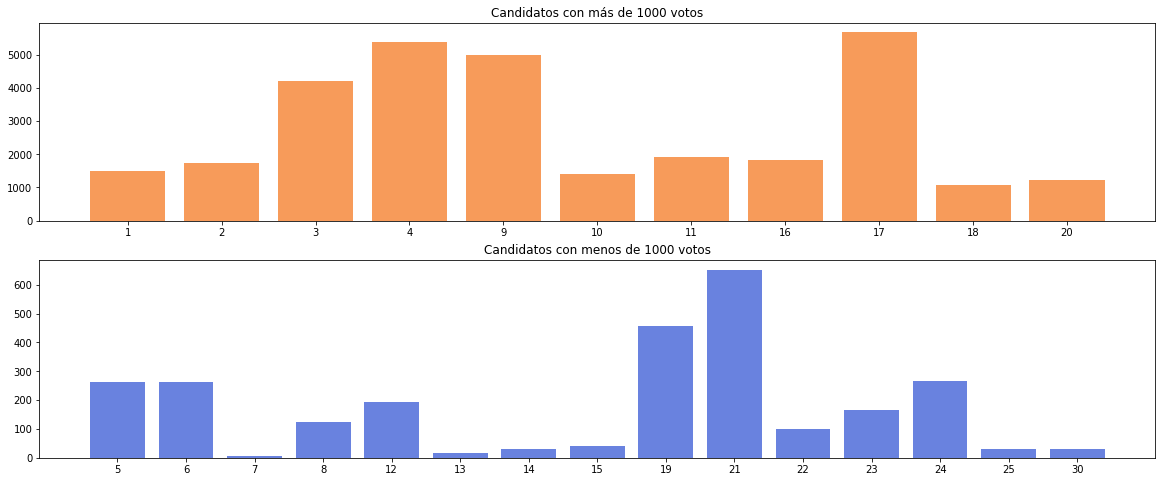

Partidos con más de 1000 votos: 
0 - Frente Amplio
1 - La Alternativa
2 - Partido Colorado
5 - Partido de la Gente
6 - Partido Nacional

Partidos con menos de 1000 votos: 
3 - Partido Ecologista Radical Intransigente
4 - Partido Digital
7 - Partido de los Trabajadores
8 - Partido Verde Animalista
9 - Unidad Popular
10 - Partido de Todos



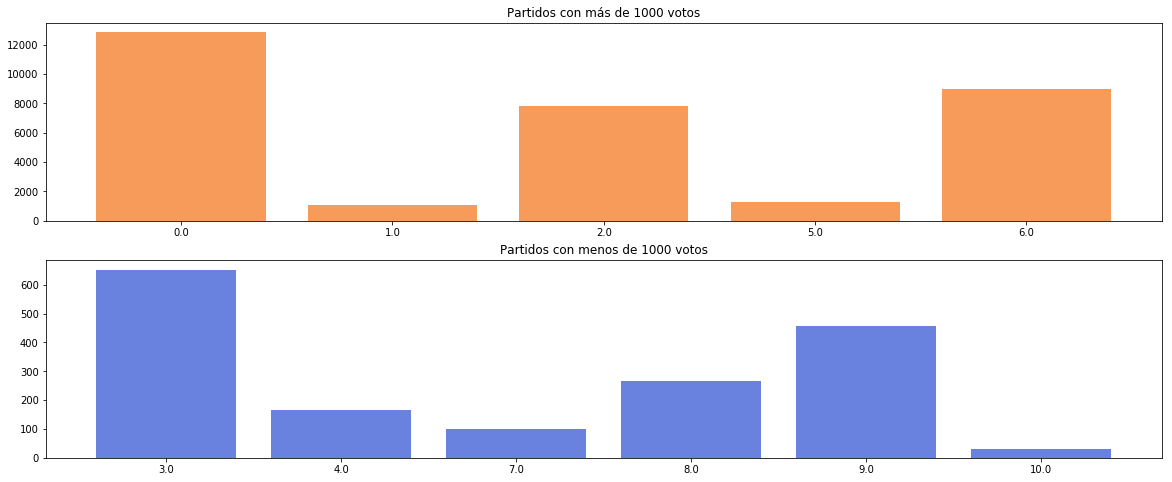

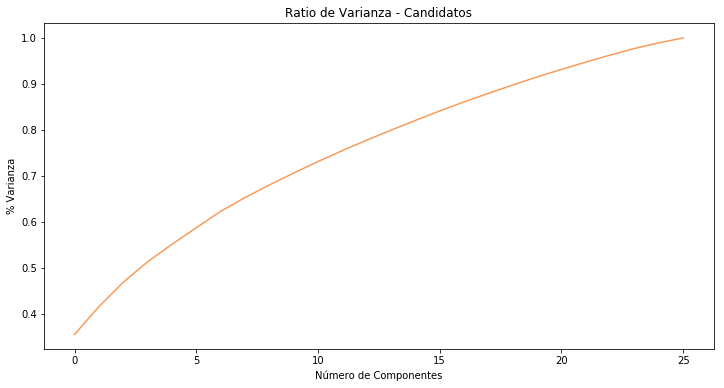

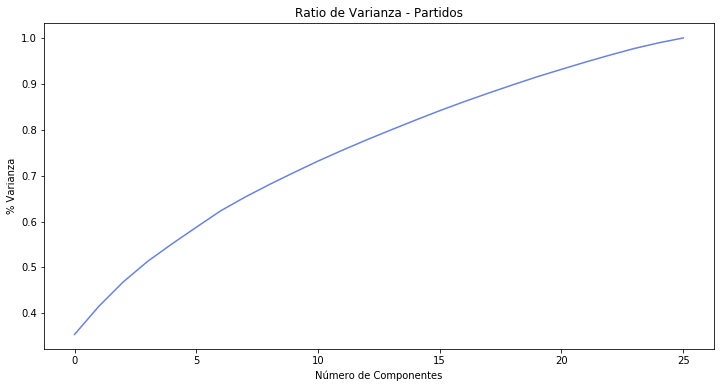

In [1]:
# Script 1 - Filtrado, partición y evaluación del corpus
# Correspondiente a parte (a) y (b)

# DEPENDENCIAS
# -----------------------------------------------------
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import evaluation.evaluator as evaluator
import utils.gui as gui
import processing.reader as reader
import plotting.corpusPlotting as corpusPlotting
import plotting.pcaPlotting as pcaPlotting
from utils.const import DATA_ENCUESTAS, SolverOps, PenaltyOps
from sklearn.model_selection import train_test_split
%matplotlib inline 

# FILTRACIÓN
# -----------------------------------------------------

# Leer dataset de respuestas a encuesta separando entre candidatos con más y menos de 1000 votos
datasetCandidatosMasMil = reader.readDatasetCandidatosMasMil('../' + DATA_ENCUESTAS, options={'from_notebook': True})
datasetCandidatosMenosMil = reader.readDatasetCandidatosMenosMil('../' + DATA_ENCUESTAS, options={'from_notebook': True})

# Leer dataset de respuestas a encuesta separando entre partidos con más y menos de 1000 votos
datasetPartiesMasMil = reader.readDatasetPartiesMasMil('../' + DATA_ENCUESTAS, options={'from_notebook': True})
datasetPartiesMenosMil = reader.readDatasetPartiesMenosMil('../' + DATA_ENCUESTAS, options={'from_notebook': True})

# PARTICIÓN
# -----------------------------------------------------

datasetCMasMil, candidatesCMasMil = datasetCandidatosMasMil
datasetPMasMil, partiesPMasMil = datasetPartiesMasMil

# Separar en conjunto de entrenamiento (80%) y conjunto de evaluación (20%)
dataset_candidates, testset_candidates, candidates, testset_candidates_results = train_test_split(datasetCMasMil, candidatesCMasMil, test_size=0.2)
dataset_parties, testset_parties, parties, testset_parties_results = train_test_split(datasetPMasMil, partiesPMasMil, test_size=0.2)

# EVALUACIÓN
# -----------------------------------------------------

# Leer datos de partidos y candidatos de los JSON.
candidatesJSON = reader.readCandidates(options = {'from_notebook': True})
partiesJSON = reader.readParties(options = {'from_notebook': True})

# Graficar distribución de votantes según candidato y partido
corpusPlotting.plotCorpus(datasetCandidatosMasMil, datasetCandidatosMenosMil, datasetPartiesMasMil, datasetPartiesMenosMil, candidatesJSON, partiesJSON)

# Graficar ratio de varianza para cada dimensión
pcaPlotting.plotPCA(datasetCandidatosMasMil, 'Candidatos')
pcaPlotting.plotPCA(datasetPartiesMasMil, 'Partidos')

En base a las gráficas de barras se puede comprobar que el filtrado según candidatos y partidos es correcto. Como se mencionó en la sección **2.2 (Preprocesamiento)**, el corpus filtrado según candidatos difiere un poco del filtrado según partidos, ya que el corpus de partidos incluye a candidatos con menos de 1000 votos que pertenecen a partidos con muchos votos, como por ejemplo la candidata Verónica Alonso, del Partido Nacional o el candidato José Amorín Batlle, del Partido Colorado.

A su vez, se puede apreciar una gran diferencia en cantidad de votantes para los candidatos Carolina Cosse, Daniel Martínez, Luis Lacalle y Ernesto Talvi, los cuales cuentan con la mayoría de los potenciales votos. El mismo fenómeno ocurre con los partidos, siendo el Frente Amplio, el Partido Nacional y el Partido Colorado aquellos que nuclean mayor cantidad de potenciales votos. Esta distribución en los datos tendrá un impacto en la clasificación, como se verá más adelante.

Finalmente, para terminar con el análisis, en la gráfica de ratio de varianza contra número de componentes se puede ver un incremento psuedolineal, sin mesetas ni grandes pendientes. Esto implica que a priori, no existe una cantidad determinada de dimensiones que permita maximizar la ganancia entre menos dimensiones y menos pérdida de información. Dicho fenómeno ya se había estudiado en la entrega anterior, teniendo un impacto en la eficacia de los clasificadores al reducir su dimensionalidad, como se verá más adelante.

### 3.3. Configuraciones paramétricas
***
A continuación se adjuntan las distintas configuraciones paramétricas utilizadas al evaluar, sus motivaciones y sus resultados. Se realizan pequeñas observaciones sobre los mismos, quedando el análisis exhaustivo pendiente para la siguiente sección.

#### 3.3.1. Evaluaciones
***
En una primera instancia, se realizaron un total de **218 evaluaciones**, de las cuales **168** corresponden a variaciones paramétricas y **50** a variaciones de dimensión $n \in [1..25]$ para la mejor variación paramétrica de candidatos y partidos respectivamente. Las evaluaciones se distribuyen según los siguientes parámetros:

- Evaluaciones paramétricas:
> - Filtrado del corpus original (2 opciones: *candidatos*, *partidos*)
> - Algoritmo de aproximación (Parámetro ***solver***, 5 opciones: *newton-cg*, *lbfgs*, *liblinear*, *sag* y *saga*)
> - Estrategia de penalización (Parámetro ***penalty***, 2 opciones: *l1*, *l2*)
> - Coeficiente de regularización (Parámetro ***C***, 4 opciones: $0.1$, $1.0$, $10.0$, $100.0$)
> - Máximo de iteraciones (Parámetro ***max_iter***, 3 opciones: $100$, $1000$, $10000$)

- Evaluaciones dimensionales:
> - Filtrado del corpus original (2 opciones: *candidatos*, *partidos*)
> - Variación de dimensión (25 opciones: $n \in [1..25]$)

Dado que los ***solver*** *newton-cg*, *lbfgs*, y *sag* soportan solamente penalización **L2**, en vez de tener **240** evaluaciones paramétricas, sólo se tiene **168**. A su vez, con el objetivo de simplificar las evaluaciones dimensionales, se fijaron las configuraciones con mejor _accuracy_ en la evaluación paramétrica tanto para candidatos como para partidos.

#### 3.3.2. Resultados
***
A continuación se adjuntan scripts que, utilizando el **conjunto de entrenamiento** definido en la anterior sección, realizan validación cruzada sobre el mismo para encontrar las mejores configuraciones paramétricas. El primer script itera sobre los distintos parámetros, mientras que el segundo fija los mejores parámetros obtenidos durante la experimentación, iterando sobre las posibles dimensiones. 

Cabe destacar que por cada configuración se entrena un clasificador por candidatos y uno por partidos respectivamente. Este hecho, sumado a la cantidad de configuraciones distintas a explorar, implica que el script puede demorar horas en probar todas las configuraciones. En el caso de que sea necesario correrlo, es recomendable hacerlo desde el **programa**, utilizando el _README_ como referencia.

In [ ]:
# Script 2 - Entrenamiento de todas las configuraciones paramétricas y selección de las mejores
# Correspondiente a parte (c)
# IMPORTANTE: Es necesario correr antes el script 1 (sección 3.2) para cargar los datos

# DEPENDENCIAS
# -----------------------------------------------------

# Debido a que la funcion cross_val_predict muestra warnings para el caso donde no se cuenta con ejemplos para cierta
# clase (fenómeno frecuente en este conjunto de datos al hacer validación cruzada), se decidió ocultarlas
import warnings
warnings.simplefilter('ignore')
import evaluation.evaluator as evaluator

# BÚSQUEDA
# -----------------------------------------------------

# Evaluar todas las configuraciones paramétricas posibles para k = 5
candidate_classifiers, party_classifiers = evaluator.getBestModel(dataset_candidates, dataset_parties, candidates, parties, 5)

# Mostrar el mejor clasificador según candidatos y según partidos
candidates_best_model, parties_best_model = gui.printBestClassifiers(candidate_classifiers, party_classifiers)

In [ ]:
# Script 3 - Entrenamiento de todas las configuraciones dimensionales y selección de las mejores
# Correspondiente a parte (d)
# IMPORTANTE: Es necesario correr antes el script 1 (sección 3.2) para cargar los datos

# DEPENDENCIAS
# -----------------------------------------------------

# Debido a que la funcion cross_val_predict muestra warnings para el caso donde no se cuenta con ejemplos para cierta
# clase (fenómeno frecuente en este conjunto de datos al hacer validación cruzada), se decidió ocultarlas
import warnings
warnings.simplefilter('ignore')
import evaluation.evaluator as evaluator

# BÚSQUEDA
# -----------------------------------------------------

# Evaluar todas las configuraciones dimensionales posibles para candidatos con k = 5
candidate_classifiers_PCA, _ = evaluator.getBestModel(dataset_candidates, dataset_parties, candidates, parties, 5, True)

# Evaluar todas las configuraciones dimensionales posibles para partidos con k = 5
_, party_classifiers_PCA = evaluator.getBestModel(dataset_candidates, dataset_parties, candidates, parties, 5, True)

# Mostrar el mejor clasificador según candidatos
candidates_best_model_PCA, _ = gui.printBestClassifiers(candidate_classifiers_PCA, None)

# Mostrar el mejor clasificador según partidos
_, parties_best_model_PCA = gui.printBestClassifiers(None, party_classifiers_PCA)

### 3.4. Elección y comparación de representantes
***
A continuación se presenta un análisis de los resultados obtenidos, separandose en dos procesos: análisis cuantitativo y cualitativo.

#### 3.4.1. Análisis cuantitativo
***
Habiendo obtenido la _accuracy_ para todas las configuraciones paramétricas, se generó una gráfica de barras (la cual se adjunta a continuación), con el objetivo de comparar la _accuracy_ de todos los clasificadores entrenados y determinar aquel con la mejor.

<div style="display: inline-block; width: 100%; text-align: center;">
    <img src="img/accuracy_parametrica.png" />
    <label style="margin-top: 2px; font-size: 16px; font-family: monospace;"> Figura 1 - Accuracy por Configuración Paramétrica </label>
</div>

Se puede ver que la _accuracy_ de los clasificadores por candidato rondó en el intervalo $[0.38, 0.39]$, mientras que para los clasificadores por partido rondó en el intervalo $[0.65, 0.66]$. Los clasificadores $8$ y $60$ particularmente, fueron los que mostraron mejor desempeño para clasificar candidatos y partidos respectivamente, por lo que se fijó su configuración paramétrica para evaluar la reducción de dimensionalidad. Dichos parámetros fueron los siguientes:

- **Clasificador 8 (Candidatos):** <br>
    Algoritmo de aproximación: _liblinear_ <br>
    Estrategia de penalización: _L2_ <br>
    Coeficiente de regularización: $100.0$ <br>
    Máximo de iteraciones: $1000$ <br>


- **Clasificador 60 (Partidos):** <br>
    Algoritmo de aproximación: _saga_ <br>
    Estrategia de penalización: _L2_ <br>
    Coeficiente de regularización: $100.0$ <br>
    Máximo de iteraciones: $10000$ <br>

Utilizando dichas configuraciones paramétricas se exploró utilizando validación cruzada la variación de dimensiones implementando _PCA_. Siguiendo la misma idea que en el análisis anterior, se obtuvo la _accuracy_ para todas las configuraciones dimensionales, generando una gráfica de barras para el clasificador de candidatos y de partidos respectivamente, con el objetivo de comparar la _accuracy_ de las distintas dimensiones posibles.

<div style="display: inline-block; width: 100%; text-align: center;">
    <img src="img/accuracy_pca_candidatos.png" />
    <label style="margin-top: 2px; font-size: 16px; font-family: monospace;"> Figura 2.1 - Accuracy por Configuración Dimensional (Candidatos) </label>
</div>

<div style="display: inline-block; width: 100%; text-align: center;">
    <img src="img/accuracy_pca_partidos.png" />
    <label style="margin-top: 2px; font-size: 16px; font-family: monospace;"> Figura 2.2 - Accuracy por Configuración Dimensional (Partidos) </label>
</div>

Se puede comprobar que la noción obtenida por el **ratio de varianza explicado** era lógica: a medida que aumentan las dimensiones, aumenta la _accuracy_ de los clasificadores. Se puede observar que se dispara la mejora en dicha métrica a partir de la inclusión de la tercera dimensión, variando relativamente poco al seguir creciendo. En cada caso, siempre se encontraron los mejores resultados a partir de la dimensión 20.

Es **crucial** tener en cuenta que en todos los casos estudiados, la variación de _accuracy_ fue mínima. De hecho, al realizar la búsqueda repetidas veces, los valores obtenidos apenas variaron. En otro escenario esto sería normal y no hubiera representado ningún problema, pero en este caso implicó que el mejor modelo cambiáse de configuración paramétrica. De todas formas, se mantuvo la elección realizada en base a los datos generados al momento de experimentar.

Los clasificadores $23$ y $22$ particularmente, fueron los que mostraron mejor desempeño para clasificar candidatos y partidos respectivamente, por lo que se determinó dicha reducción dimensional como óptima. Para repasar, los parámetros fueron los siguientes:

- **Clasificador 23 (Candidatos):** <br>
    Algoritmo de aproximación: _liblinear_ <br>
    Estrategia de penalización: _L2_ <br>
    Coeficiente de regularización: $100.0$ <br>
    Máximo de iteraciones: $1000$ <br>
    Dimensionalidad: $23$ <br>


- **Clasificador 22 (Partidos):** <br>
    Algoritmo de aproximación: _saga_ <br>
    Estrategia de penalización: _L2_ <br>
    Coeficiente de regularización: $100.0$ <br>
    Máximo de iteraciones: $10000$ <br>
    Dimensionalidad: $22$ <br>

#### 3.4.2. Análisis cualitativo
***
Habiendo determinado 4 representantes en la anterior subsección, es pertinente realizar un análisis más exhaustivo de los mismos, incluyendo la consigna de la parte ***e***. Para ello, se adjunta a continuación un script que dado un modelo en particular, lo entrena utilizando el **conjunto de entrenamiento** y lo valida utilizando el **conjunto de evaluación**, mostrando las métricas calculadas.

In [ ]:
# Script 4 - Validación de los representantes obtenidos utilizando el conjunto de evaluación
# Correspondiente a parte (e)
# IMPORTANTE: Es necesario correr antes el script 1 (sección 3.2) para cargar los datos

# DEPENDENCIAS
# -----------------------------------------------------

# Debido a que la funcion cross_val_predict muestra warnings para el caso donde no se cuenta con ejemplos para cierta
# clase (fenómeno frecuente en este conjunto de datos al hacer validación cruzada), se decidió ocultarlas
import warnings
warnings.simplefilter('ignore')

import plotting.evalPlotting as evalPlotting
from model.model import Model
from utils.const import SolverOps, PenaltyOps

# EVALUACIÓN NORMAL
# -----------------------------------------------------

# Se generan las opciones de uno de los representantes, variar para ver otra información
options = {
    'pca_dimension': 0, # 0 no aplica PCA, variar entre 1 y 25             
    'solver': SolverOps.LIBLINEAR,
    'penalty': PenaltyOps.L2,
    'max_iter': 1000,
    'regulation_strength': 100.0,
    'candidate_to_party': False # Este parámetro se usa en la parte f
}
# Se utiliza el dataset completo ya que el modelo internamente separa utilizando las mismas funciones que el script 1
m = Model(datasetCMasMil.values, datasetPMasMil.values, candidatesCMasMil.values, partiesPMasMil.values, options)
    
# Entrenar utilizando conjunto de entrenamiento
m.train()

# Evaluar utilizando conjunto de evaluación (k = 0)
evaluation = m.evaluate(0)

# Mostrar la evaluación
gui.printEvaluation(evaluation, 0)
evalPlotting.plotSingleEvaluation(evaluation, 0)

Corriendo el anterior script para los representantes anteriormente designados, se pudo realizar ciertas observaciones interesantes adjuntadas a continuación:

**Observaciones:**
- Respecto a las configuraciones paramétricas, el desempeño de todos los clasificadores fue similar, no pudiendo identificar patrones específicos para ciertas configuraciones. 
- En general la _precision_ y el _recall_ fueron similares entre sí para las mismas clases.
- Los clasificadores por candidatos en general confundieron a los candidatos del Frente Amplio. Por otra parte, los clasificadores por partido dieron los mejores resultados para el Frente Amplio, demostrando que los votantes de dicho partido se encuentran más próximos entre sí en el corpus, facilitando la aproximación.
- Por otra parte, para candidatos como Luis Lacalle o Ernesto Talvi (que representan la mayoría de votos de sus respectivos partidos), los clasificadores confundieron al resto de candidatos de derecha con dichos candidatos. Al comparar con clasificadores por partido, se observó un fenómeno similar entre el Partido Nacional y el Partido Colorado.
- Las matrices de confusión y sus mapas de calor secundan esta teoría, mostrando muchos ejemplos de ambos partidos siendo confundidos por el clasificador.

Debido a los datos observados, se determinó no cambiar los representantes elegidos.

#### 3.4.3. Representantes elegidos
***

Sin reducir la dimensionalidad, se determinaron los siguientes clasificadores:

- **Clasificador de Candidatos:** <br>
    Algoritmo de aproximación: _liblinear_ <br>
    Estrategia de penalización: _L2_ <br>
    Coeficiente de regularización: $100.0$ <br>
    Máximo de iteraciones: $1000$ <br>


- **Clasificador de Partidos:** <br>
    Algoritmo de aproximación: _saga_ <br>
    Estrategia de penalización: _L2_ <br>
    Coeficiente de regularización: $100.0$ <br>
    Máximo de iteraciones: $10000$ <br>

Reduciendo la dimensionalidad, se determinaron los siguientes clasificadores:

- **Clasificador de Candidatos:** <br>
    Algoritmo de aproximación: _liblinear_ <br>
    Estrategia de penalización: _L2_ <br>
    Coeficiente de regularización: $100.0$ <br>
    Máximo de iteraciones: $1000$ <br>
    Dimensionalidad: $23$ <br>


- **Clasificador de Partidos:** <br>
    Algoritmo de aproximación: _saga_ <br>
    Estrategia de penalización: _L2_ <br>
    Coeficiente de regularización: $100.0$ <br>
    Máximo de iteraciones: $10000$ <br>
    Dimensionalidad: $22$ <br>

### 3.5. Comparación de clasificadores según partido
***
Manteniendo a los 4 representantes determinados en la anterior subsección, se procedió a llevar a cabo la consigna de la parte ***f***. Para ello, se adjunta a continuación un script que dado un modelo en particular, lo entrena utilizando el **conjunto de entrenamiento** y lo valida utilizando el **conjunto de evaluación**, mostrando las métricas calculadas, comparando el rendimiento entre el modelo de candidatos y de partidos.

Es importante destacar que el modelo de candidatos devuelve el partido asociado al mismo, como se pide en la consigna.


-> EVALUACIÓN NORMAL

---------- Clasificación según candidatos ----------

-> Accuracy: 0.3848015488867377
-> Matriz de Confusión: 

[[ 63   1 111  79  18   0   0   0   6   0   0]
 [  8   6  77 210   8   0   2   0  32   0   0]
 [ 29   2 348 425  32   1   0   0  37   0   0]
 [ 36   3 235 668  53   0   1   0  76   0   0]
 [  5   0  16  64 561   0   4   1 329   0   3]
 [  0   0   5  22 121   1   0   0  94   0   3]
 [  2   0  14  42 181   0   2   0 150   0   2]
 [  1   0  10  45 181   0   3   0 125   0   0]
 [  3   1  20 109 309   0   1   1 735   0   0]
 [  3   1  18  66  38   1   1   0  99   0   0]
 [  3   0  10  18 122   1   1   0  82   0   1]]

-> Métricas: 

              precision    recall  f1-score   support

           1       0.41      0.23      0.29       278
           2       0.43      0.02      0.03       343
           3       0.40      0.40      0.40       874
           4       0.38      0.62      0.47      1072
           9       0.35      0.57      0.43       983
      

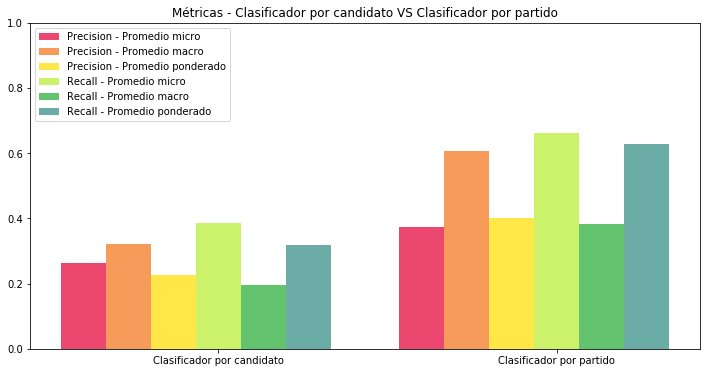

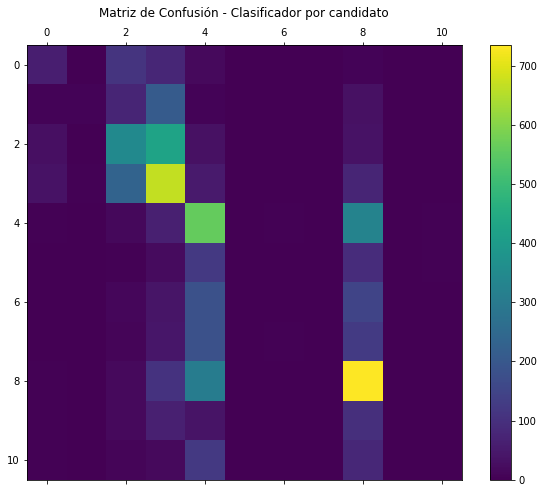

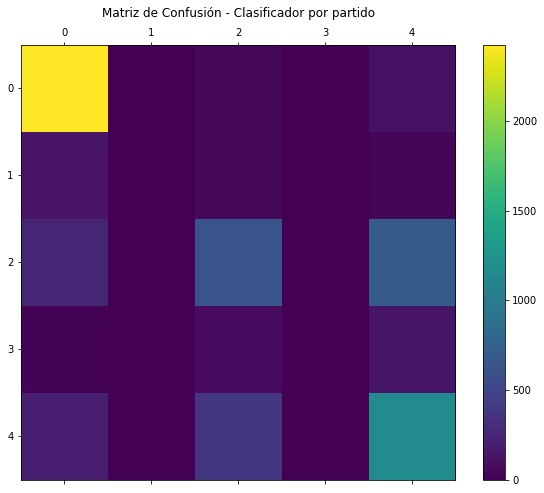

In [2]:
# Script 5 - Comparación de los representantes de candidatos y partidos, 
# Correspondiente a parte (e)
# IMPORTANTE: Es necesario correr antes el script 1 (sección 3.2) para cargar los datos

# DEPENDENCIAS
# -----------------------------------------------------

# Debido a que la funcion cross_val_predict muestra warnings para el caso donde no se cuenta con ejemplos para cierta
# clase (fenómeno frecuente en este conjunto de datos al hacer validación cruzada), se decidió ocultarlas
import warnings
warnings.simplefilter('ignore')

import plotting.evalPlotting as evalPlotting
from model.model import Model
from utils.const import SolverOps, PenaltyOps

# EVALUACIÓN NORMAL
# -----------------------------------------------------

# Se generan las opciones de uno de los representantes, variar para ver otra información
options = {
    'pca_dimension': 0, # 0 no aplica PCA, variar entre 1 y 25             
    'solver': SolverOps.LIBLINEAR,
    'penalty': PenaltyOps.L2,
    'max_iter': 1000,
    'regulation_strength': 100.0,
    'candidate_to_party': True,
    'from_notebook': True
}
# Se utiliza el dataset completo ya que el modelo internamente separa utilizando las mismas funciones que el script 1
m = Model(datasetCMasMil.values, datasetPMasMil.values, candidatesCMasMil.values, partiesPMasMil.values, options)
    
# Entrenar utilizando conjunto de entrenamiento
m.train()

# Evaluar utilizando conjunto de evaluación (k = 0)
evaluation = m.evaluate(0)

# Mostrar la evaluación
gui.printEvaluation(evaluation, 0)
evalPlotting.plotSingleEvaluation(evaluation, 0)

A

## 4. Conclusiones
***

#### 4.1. Respecto a los Datos
***
- Como se estudió en el laboratorio anterior, el corpus de datos no parece tener la estructura ideal para implementar este tipo de clasificadores.

#### 4.2. Respecto a los Parámetros
***
- No se detectaron grandes variantes en los resultados al variar los parámetros.

#### 4.3. Respecto a los Resultados
***
- Fueron malos en general, lo cual puede estar relacionado al hecho de que el corpus original utiliza un método sumamente distinto para clasificar.

## 5. Referencias
***
[1] **Documentación oficial de Scikit-Learn** - https://scikit-learn.org/stable/documentation.html

[2] **Minimizing Finite Sums with the Stochastic Average Gradient** - https://hal.inria.fr/hal-00860051/document

[3] **SAGA: A Fast Incremental Gradient Method With Support for Non-Strongly Convex Composite Objectives** - https://arxiv.org/pdf/1407.0202.pdf
